# Datos Ausentes

## Identificación de datos faltantes

Una de las principales tareas de los analistas de datos es el pre-procesado de datos. Se estima que total de tiempo invertido en un análisis, el 80% de este se destina a tareas de pre-procesamiento de datos.

Dado lo anterior, es relevante poder comprender los datos que tenemos presente en los dataset, es decir, identificar presencia de valores ausentes, tipo de dato que tenemos (numérico, flotante, string, fecha, ect.), concistencia de los datos (texto en mayuscula y/o minúsculas), presencia de valores atípicos, por mencionar algunos. 

A continuación, abordaremos la problemática de los datos ausentes en nuestros dataset. Antes de comenzar, debemos comprender que los datos faltantes se pueden dar por diversas razones, tales como:

- Evitar entregar respuesta a preguntas privadas, tales como ingresos.
- Pérdida de datos por desgaste de la persona que está ingresando la información.
- Error humano.

A continuación, procederemos a revisar cómo detectar valores ausentes en nuestros dataset y posteriormente abordaremos el tratamiento de los mismos.

Debemos considerar que no todas las funciones y/o algorítmo permiten trabajar con valores ausentes, por lo tanto es de importancia el poder tratar este tipo de dato. Veamos a continuación un ejemplo:


In [2]:
# Importar módulo
import numpy as np

# Lista de valores
valores = [0,9,4,np.nan]

# Función sum
print(f'El total asciende a {sum(valores)}')

# Función np.mean
print(f'El promedio asciende a {np.mean(valores)}')

# Función np.meadiana
print(f'La mediana asciende a {np.median(valores)}')



El total asciende a nan
El promedio asciende a nan
La mediana asciende a nan


Observamos que estas funciones no resisten la presencia de valores ausente, de ahí radica la importancia para su detección y posterior tratamiento.

Existen funciones donde la solución es remover el valor ausente para poder generar sus cálculos. Sin embargo, no siempre es la mejor solución. Esto lo veremos más adelante.

`numpy` ofrece funciones las cuales, antes de proceder al cálculo remueve los datos ausentes.

In [3]:
# Función sum
print(f'El total asciende a {np.nansum(valores)}')

# Función np.mean
print(f'El promedio asciende a {np.nanmean(valores)}')

# Función np.meadiana
print(f'La mediana asciende a {np.nanmedian(valores)}')

El total asciende a 13.0
El promedio asciende a 4.333333333333333
La mediana asciende a 4.0


A modo de comprobación, tomaremos la lista de datos, eliminando nuestro valor NaN y procederemos a realizar los cálculos ya efectuados.

In [4]:
# Lista de valores
valores = [0,9,4]

# Función sum
print(f'El total asciende a {sum(valores)}')

# Función np.mean
print(f'El promedio asciende a {np.mean(valores)}')

# Función np.meadiana
print(f'La mediana asciende a {np.median(valores)}')

El total asciende a 13
El promedio asciende a 4.333333333333333
La mediana asciende a 4.0


Por medio del ejemplo anterior, podemos notar que la presencia de valores nulos en el dataset nos puede llevar a errores en el cálculo de estadígrafos de tendencia central.

Para continuar el estudio de datos faltantes, procederemos a revisar un pequeño dataset con presencia de datos faltantes.

**Ejemplo 1**

In [5]:
# Importar módulos
import numpy as np
import pandas as pd

In [184]:
# Identificar archivo csv
file = "datos/payment.csv"

# Importar data
data = pd.read_csv(file, sep=";")

# Dimensión de la data
print(data.shape)

(10, 5)


In [7]:
# Información de la data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customerID      10 non-null     object
 1   MonthlyCharges  8 non-null      object
 2   TotalCharges    8 non-null      object
 3   PaymentMethod   9 non-null      object
 4   Churn           10 non-null     object
dtypes: object(5)
memory usage: 528.0+ bytes


Se observa presencia de valores nulos en algunas columnas. Para verificar la presencia de estos valores, se procede a capturar valores unicos por columna por medio de un loop `for` a fin de hacer menos compleja su busqueda.

In [8]:
# Iterar valores por columnas
for columna in data.columns:
    # Ordenar valores y seleccionar valores únicos
    i = data[columna].sort_values().unique()
    # Imprimir nombre de columnas y lista de sus valores únicos
    print(columna, i, '\n')
    

customerID ['1452-KIOVK' '3668-QPYBK' '5575-GNVDE' '6713-OKOMC' '7590-VHVEG'
 '7795-CFOCW' '7892-POOKP' '8451-AJOMK' '9237-HQITU' '9305-CDSKC'] 

MonthlyCharges ['104.8' '29.85' '42.3' '54.1' '56.95' '70.7' '89.1' 'Nan' nan] 

TotalCharges ['108.15' '109.9' '1840.75' '1949.4' '3046.05' '354.95' '820.5' 'na' nan] 

PaymentMethod ['--' 'Bank transfer' 'Credit card' 'Electronic check' 'Mailed check' nan] 

Churn ['no' 'yes'] 



Por medio de esta función hemos identificado las diferentes maneras de ingreso de los valores nulos al Dataframe.
A continuación, procederemos a leer nuevamente el archivo csv agregando el parámetro __na_values__ donde indicaremos el formato de los valores nulos.

**Ejemplo 2**

In [11]:
# volver a importar la data identificando los nulos
data = pd.read_csv(file, sep=";", na_values= ["Nan","nan", "na","--"])

# Visualizar primeros 5 registros
data.head()

,customerID,MonthlyCharges,TotalCharges,PaymentMethod,Churn
0,7590-VHVEG,29.85,109.90,Electronic check,yes
1,5575-GNVDE,56.95,NaN,Mailed check,yes
2,3668-QPYBK,NaN,108.15,NaN,yes
3,7795-CFOCW,42.30,1840.75,Bank transfer,no
4,9237-HQITU,70.70,NaN,Electronic check,no


In [12]:
# Info de la data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customerID      10 non-null     object 
 1   MonthlyCharges  7 non-null      float64
 2   TotalCharges    7 non-null      float64
 3   PaymentMethod   7 non-null      object 
 4   Churn           10 non-null     object 
dtypes: float64(2), object(3)
memory usage: 528.0+ bytes


Hemos identificado presencia de valores ausente en 2 de las 5 columnas. Además, gracias a la especificación de valores nulos en el parámetro __na_values__ la función de importación del archivo ha inferido correctamente el esquema de los datos, es decir, variables que presentan valores numéricos han sido importadas cómo tal. Lo mismo para las variables de texto las cuales han sido detectadas como tal.

In [13]:
# Estadisgrafos descriptivos
data.describe()

,MonthlyCharges,TotalCharges
count,7.000000,7.000000
mean,63.971429,1175.671429
std,26.218185,1126.536177
min,29.850000,108.150000
25%,48.200000,232.425000
50%,56.950000,820.500000
75%,79.900000,1895.075000
max,104.800000,3046.050000


Ahora bien, usando las funciones del paquete matplotlib, procederemos a visualizar por medio de un gráfico de barra la cantidad de datos completos por columnas.

<Axes: title={'center': 'Cantidad datos completos'}>

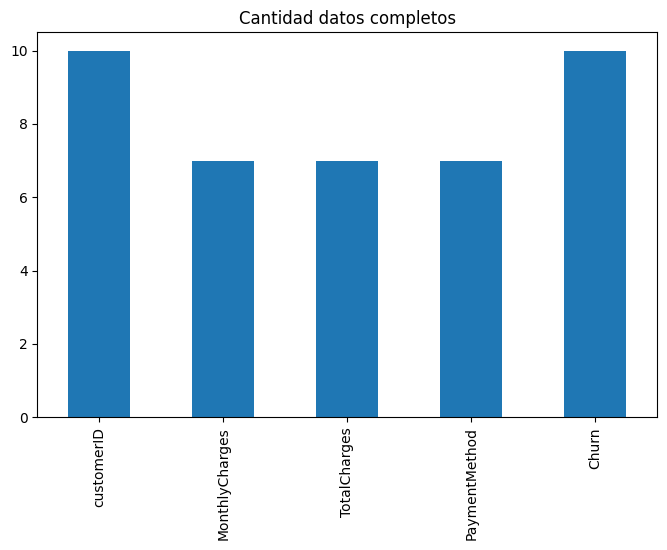

In [14]:
# Data no nula
data.notna().sum().plot(kind='bar', 
                        title = 'Cantidad datos completos',
                        figsize= (8,5))

In [15]:
# Cantidad de datos perdidos
data.isnull().sum()

customerID        0
MonthlyCharges    3
TotalCharges      3
PaymentMethod     3
Churn             0
dtype: int64

In [16]:
# Porcentaje de datos perdidos
data.isnull().mean()*100

customerID         0.0
MonthlyCharges    30.0
TotalCharges      30.0
PaymentMethod     30.0
Churn              0.0
dtype: float64

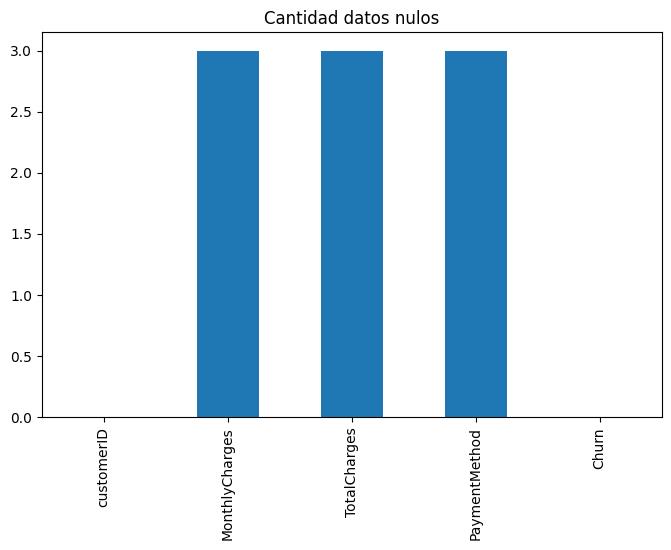

In [17]:
import matplotlib.pyplot as plt 

data.isnull().sum().plot(kind='bar' , title = 'Cantidad datos nulos',figsize= (8,5))
plt.show()

Gracias al paquete matplotlib hemos podido graficar y detectar de manera visual la presencia de valores ausentes. Sin embargo, realizar estas visualizaciones nos demanda generar líneas de códigos. 

Lo anterior, se ve facilitado gracias al paquete missingno. 

### Biblioteca missingno

Esta biblioteca nos proporciona un conjunto de herramientas de visualizaciones para la detección de valores ausentes

A continuación, aplicaremos los distintos tipos de visualizaciones que nos ofrece. Para esto, usaremos el mismo dataset payment.csv.

In [18]:
# Importar biblioteca
#%pip install missingno
import missingno as msno

**- Matriz de datos nulos**

Esta matriz permite detectar patrones visuales en la completitud de la data.

El gráfico de la derecha resume la completitud de los datos. Además, señala las filas con el máximo y mínimo de datos presente en el dataset.

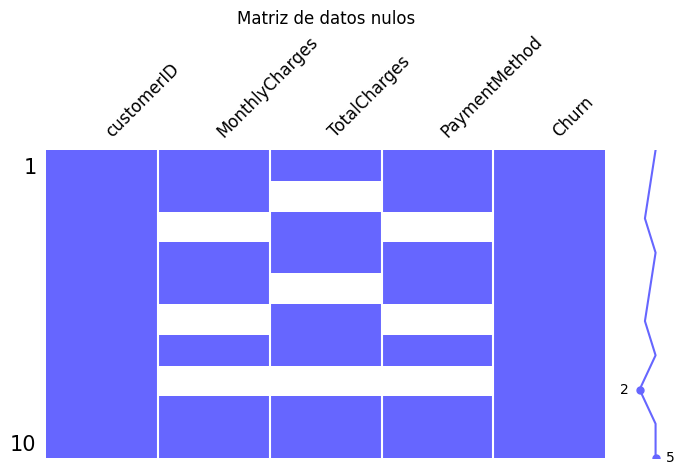

In [19]:
# Visualizar valore faltantes por medio de una matriz
msno.matrix(data, color=(0.4,0.4,1),fontsize= 12, figsize= (8,4))
plt.title('Matriz de datos nulos')
plt.show()

**- Gráfico de barras**

Este gráfico ofrece una simple visualización de nulidad por columna.

A la izquierda de la gráfica aparece el porcentaje total de completitud de la data. En el sector derecho muestra la cantidad de data completa, es decir, representa el número máximo de filas del dataset. En tanto, en la parte superior muestra la cantidad de total de datos completos por columnas.

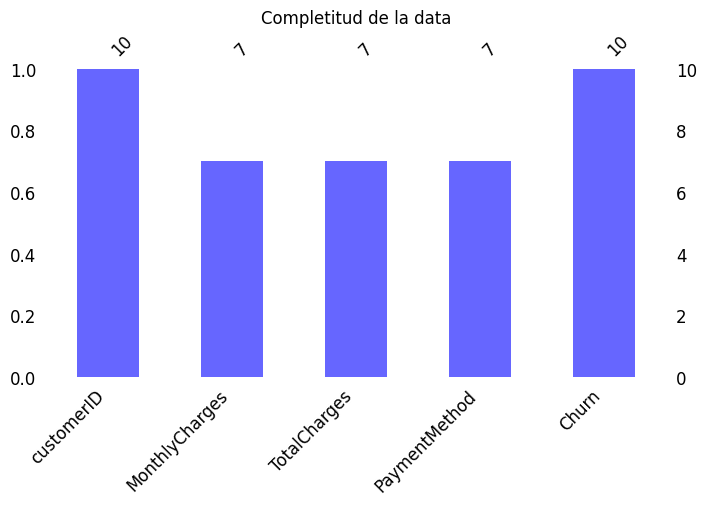

In [20]:
# Visualizar valore faltantes a través de un gráfico de barras
msno.bar(data, color=(0.4,0.4,1),fontsize= 12,figsize= (8,4))
plt.title('Completitud de la data')
plt.show()

**- Mapa de calor**

Esta gráfica muestra las correlaciones entre cada una de las variables del dataset. Es decir, nos muestra la relación entre la presencia de valores nulos entre cada una de las columnas. Los valores que muestra esta gráfica puede ser interpretado de la siguiente manera:

-  Valores próximos a 1: Valores nulos de una columna está correlacionada positivamente con los valores nuelos de la otra columna.


-  Valores próximos a -1: Valores nulos de una columna presenta una correalación inversa con los valores nuelos de la otra columna, es decir, cuando hay valores nulos en una columna, hay valores presentes en la otra columna, y viceversa.

- Los valores cercanos a 0: No hay correalción entre columnas

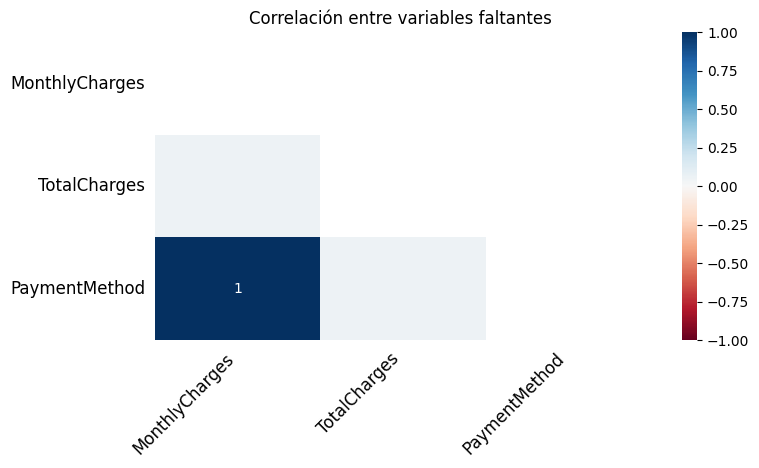

In [21]:
# Visualización de la correlación entre el número de valores faltantes in diferentes columnas por medio de un 
# mapa de calor
msno.heatmap(data, fontsize=12,figsize= (8,4))
plt.title('Correlación entre variables faltantes ')
plt.show()

Se observa una fuerte correlación positiva entre la variable *PaymentMethod* con las variables *MontthlyCharges* y *TotalCharges*.

**- Dendograma**

Esta gráfica proporciona un árbol jerárquico el cuál agrupa las variables que tienen fuerte correlación en su data nula.

Si varias varaibles se agrupan en el nivel cero, entonces la presencia de nulos en una de esas columnas está directamente relacionada con la presencia o ausencia de nulos en las demás columnas. Cuanto más separadas estén las columnas en el árbol, menos probable será que los valores nulos estén correlacionados entre las columnas.

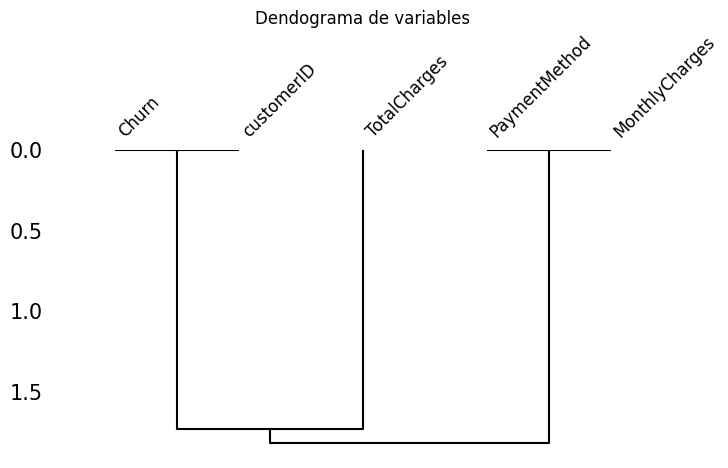

In [22]:
msno.dendrogram(data, fontsize=12,figsize= (8,4))
plt.title('Dendograma de variables')
plt.show()

Este dendograma muestra una correlación entre las variables con datos ausentes *PaymentMethod* con la variable *MontthlyCharges*, y éstas a su vez con la varaible *TotalCharges*.

**Ejemplo 3**

A continuación, trabajaremos con el dataset *diabetes.csv* para identificar y visualizar la presencia de datos ausentes. A continuación importaremos el dataset

In [185]:
# Archivo csv
file = "datos/diabetes.csv"

# Leer csv
diabetes = pd.read_csv(file, sep=",")

# Visualizar primeros registros
diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Observamos que nuestro dataset presenta las siguientes varaibles, las cuales procederemos a analizar los valores que cada una de las variables puede tomar.

- Pregnancies: número de veces que ha estado embarazada la persona de estudio.

- Glucose: Señala la cantidad de glucosa en la sangre. Cuando una persona ha ingerido alimento los valores normales son menores a 140 mg/DL y cuando los resultados se dan entre 140 a 190 son indicativos de diabetes.

- BloodPressure: La cantidad de presión que hay en las arterias entre un latidos.

- SkinThickness: Procedimiento frecuentemente utilizado, para estimar la grasa corporal, es decir, es el grosor de la piel. Sus valores oscilan entre 15 mm  y 205mm.

- Insulin: Es una prueba que mide cuánta insulina tiene en la sangre. Los valores normales durante la noche y entre comidas, en personas no diabéticas, oscilan entre 60-100mg/dl y 140 mg/dl o menos después de las comidas y aperitivos.

- BMI: Es un método utilizado para estimar la cantidad de grasa corporal que tiene una persona, y determinar por tanto si el peso está dentro del rango normal, o por el contrario, se tiene sobrepeso o delgadez.

- DiabetesPedigreeFunction: Una función que califica la probabilidad de diabetes según los antecedentes familiares.

- Age: Edad.

- Outcome: si es positivo o negativo al diagnóstico de diabetes.

Junto con lo anterior, procederemos a realizar un revisión de la data para determinar si existen valores nulos. Para esto usaremos las funciones `info()`.

In [152]:
# Información de la data
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Por medio de esta función, podemos indicar que cada una de las columnas presentan la totalidad de los datos. Para verificar lo anterior, procederemos a realizar una sumatoria a los datos nulos de cada una de las columnas.

In [153]:
# Contar valores nulos por columna
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Tampoco hemos detectado ausencia de datos. Por lo tanto, por medio de la función `describe()` obtendremos estadisticas descriptivas para cada una de las variables.

In [125]:
# Estadísticas descriptiva del dataset
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


A simple vista, podemos decir que no existen valores nulos en la data. Sin embargo, al revisar los valores mínimos de cada una de las variables observamos que casi todas presentan valor cero. Dicho valor, en algunos casos, correspondería a dato faltante para las columnas __Glucose__, __BloodPressure__ __SkinThickness__, __Insulin__ y __BMI__. En cambio, para las variables __Pregnancies__, __DiabetesPedigreeFunction__, __Age__ y __Outcome__ es posible que contenga valor cero.

A continuación, para las variables donde el valor cero (0) corresponde a dato faltante, reemplazaremos dicho valor por NaN. Para esto seleccionaremos las columnas con valores a modificar generando una lista y luego por medio de un bucle for realizaremos el reemplazo de valor.

In [154]:
# Selección de columnas a modificar
columnas_cambiar = list(diabetes.columns[1:6])
print(columnas_cambiar)

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


In [155]:
# Bucle for
for columna_cambiar in columnas_cambiar:
    # seleccionar df.loc[filas == 0 , columna]
    diabetes.loc[diabetes[columna_cambiar] == 0 , columna_cambiar] = np.nan

Ahora, aplicaremos nuevamente las funciones para detectar valores nulos.

In [157]:
# Info de la data
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [158]:
# Descripción de la data
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Ahora nuestra data si cuenta con datos faltantes. Además, los valores de los estadígrafos han cambiado producto de este reemplazo.

Para visualizar y comprender la data nula usaremos la gráficas que ofrece la biblioteca missingno.

In [159]:
# Bibliotecas
import matplotlib.pyplot as plt
import missingno as msno

**-Gráfico de Barras**

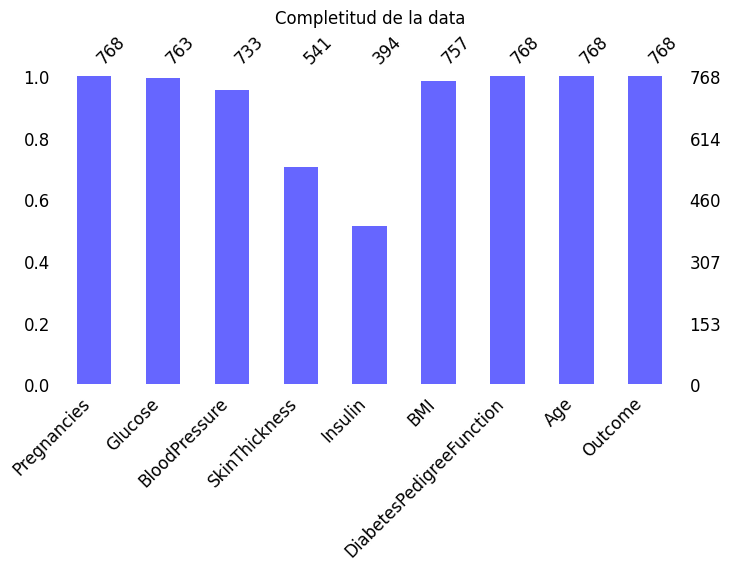

In [177]:
# Visualizar valore faltantes a través de un gráfico de barras
msno.bar(diabetes, color=(0.4,0.4,1),fontsize= 12,figsize= (8,4))
plt.title('Completitud de la data')
plt.show()

Observamos que las variables con mayor cantidad de datos ausentes son *Insulin*, *SkinThickness*, *BloodPressure*, *BMI*. A continuación visualizaremos la matriz de datos nulos ordenando desde las variables con mayor cantidad de datos nuelos.

**- Matriz de datos faltantes**

Para dar una mejor interpretación de la data ausente, en primer lugar ordenaremos los valores de acuerdo a las variables con mayor cantidad de datos nulos y luego procederemos a visualizar dicha data.

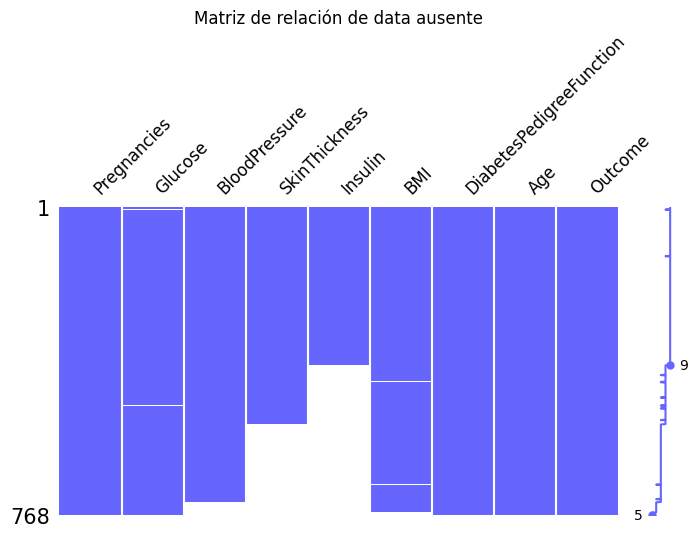

In [181]:
# Ordenar DataFrame por la variables
diabetes_sort = diabetes.sort_values(['Insulin', 'SkinThickness', 'BloodPressure','BMI'])

# Graficar los valores perdidos.
msno.matrix(diabetes_sort, color=(0.4,0.4,1),fontsize= 12,figsize= (8,4))
plt.title('Matriz de relación de data ausente')
plt.show()

Podemos obervar que la variable _Insuline_ está correlada con la variable _SkinThickness_ ya que ambas muestran correlación con sus datos no nulos y datos ausentes.

Además, podemos realizar algunas conjeturas:

- Glucose: contiene datos perdidos completamente al azar
- BMI: contiene datos perdidos completamente al azar
- Insulin: contine datos perdidos no debido al azar
- SkinThickness: contine datos perdidos no debido al azar
- BloodPresure: contiene datos perdidos no debido al azar

Para confirmar dichas conjeturas, debemos ver si existe un patrón sistemático, es decir, los casos con valores perdidos debería comportarse de manera distinta a las variables sin valores perdidos. Para eso, se debe comprobar qué variables se comportan de manera distinta en los dos grupos para dedicir la existencia o no de un patrón por medio de una diferencia de medias en los casos con y sin valores perdidos.

Para este ejemplo, no realizaremos dicho test de diferencia de medias.

- Mapa de calor

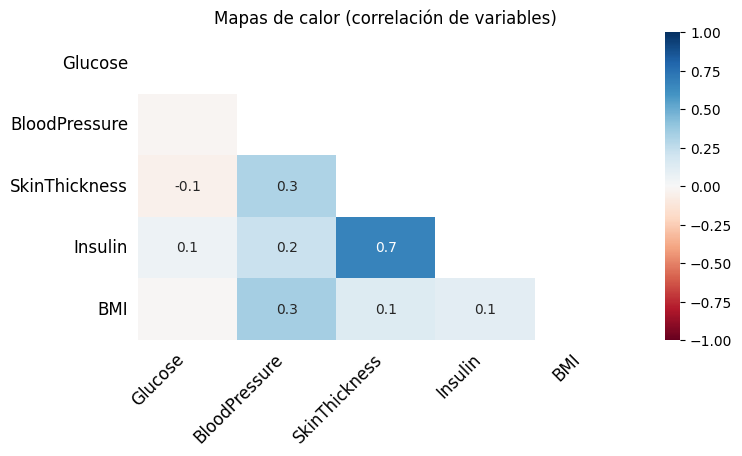

In [182]:
# Mapas de calor
msno.heatmap(diabetes,fontsize= 12,figsize= (8,4))
plt.title('Mapas de calor (correlación de variables)')
plt.show()

Esta visualización confirma la conclusión obtenida en el gráfico anterior, donde la variable Insuline está altamente correlada de manera positiva (0.7) con la variable SkinThickness.

**-Dendograma**

Otro método para conocer el tipo de dato ausente es el __dendograma__. Este gráfico muestra la correlación de variables agrupandolas. 

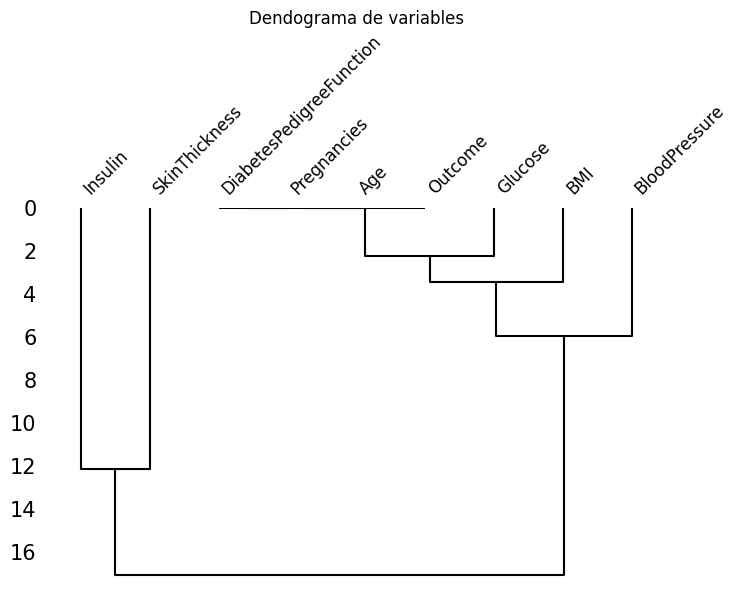

In [183]:
msno.dendrogram(diabetes, fontsize=12,figsize= (8,5))
plt.title('Dendograma de variables')
plt.show()

Podemos observar la existencia de algunos cluster por similitud de dato ausente:
- Cluster sin dato ausente: diabetesPedrigreeFunction, Pregnancies, Age, Outcome
- Cluster alta correlación de datos faltantes: Insuline, SkinThinckness. Se puede reafirmar que los datos de estas variables presenta datos perdidos no al azar.
- Cluster baja correlación de datos faltantes: Glucose, BMI, BloodPresure. De estas variables se podría concluir que Glucose contiene datos perdidos completamente al azar 

Los pasos siguientes son la eliminación o imputación de data ausente al dataset objeto de análisis, los cuales realizaremos más adelante.